# 1. Load Dataset

In [1]:
# Import library yang diperlukan
import pandas as pd

# Memuat dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/compas-scores-two-years.csv"
df = pd.read_csv(url)

# Menampilkan 5 baris pertama
df.head()



,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


# 2. EDA dan Feature Engineering

In [2]:
# Memilih kolom yang relevan
cols_to_keep = ['age', 'race', 'sex', 'priors_count', 'c_charge_degree', 'two_year_recid']
df = df[cols_to_keep]

# Menangani nilai yang hilang
df = df.dropna()

# Menampilkan informasi dataset
df.info()

# Menampilkan statistik deskriptif
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              7214 non-null   int64 
 1   race             7214 non-null   object
 2   sex              7214 non-null   object
 3   priors_count     7214 non-null   int64 
 4   c_charge_degree  7214 non-null   object
 5   two_year_recid   7214 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 338.3+ KB


,age,race,sex,priors_count,c_charge_degree,two_year_recid
count,7214.000000,7214,7214,7214.000000,7214,7214.000000
unique,NaN,6,2,NaN,2,NaN
top,NaN,African-American,Male,NaN,F,NaN
freq,NaN,3696,5819,NaN,4666,NaN
mean,34.817993,NaN,NaN,3.472415,NaN,0.450652
std,11.888922,NaN,NaN,4.882538,NaN,0.497593
min,18.000000,NaN,NaN,0.000000,NaN,0.000000
25%,25.000000,NaN,NaN,0.000000,NaN,0.000000
50%,31.000000,NaN,NaN,2.000000,NaN,0.000000
75%,42.000000,NaN,NaN,5.000000,NaN,1.000000


# 3. Data Visualization

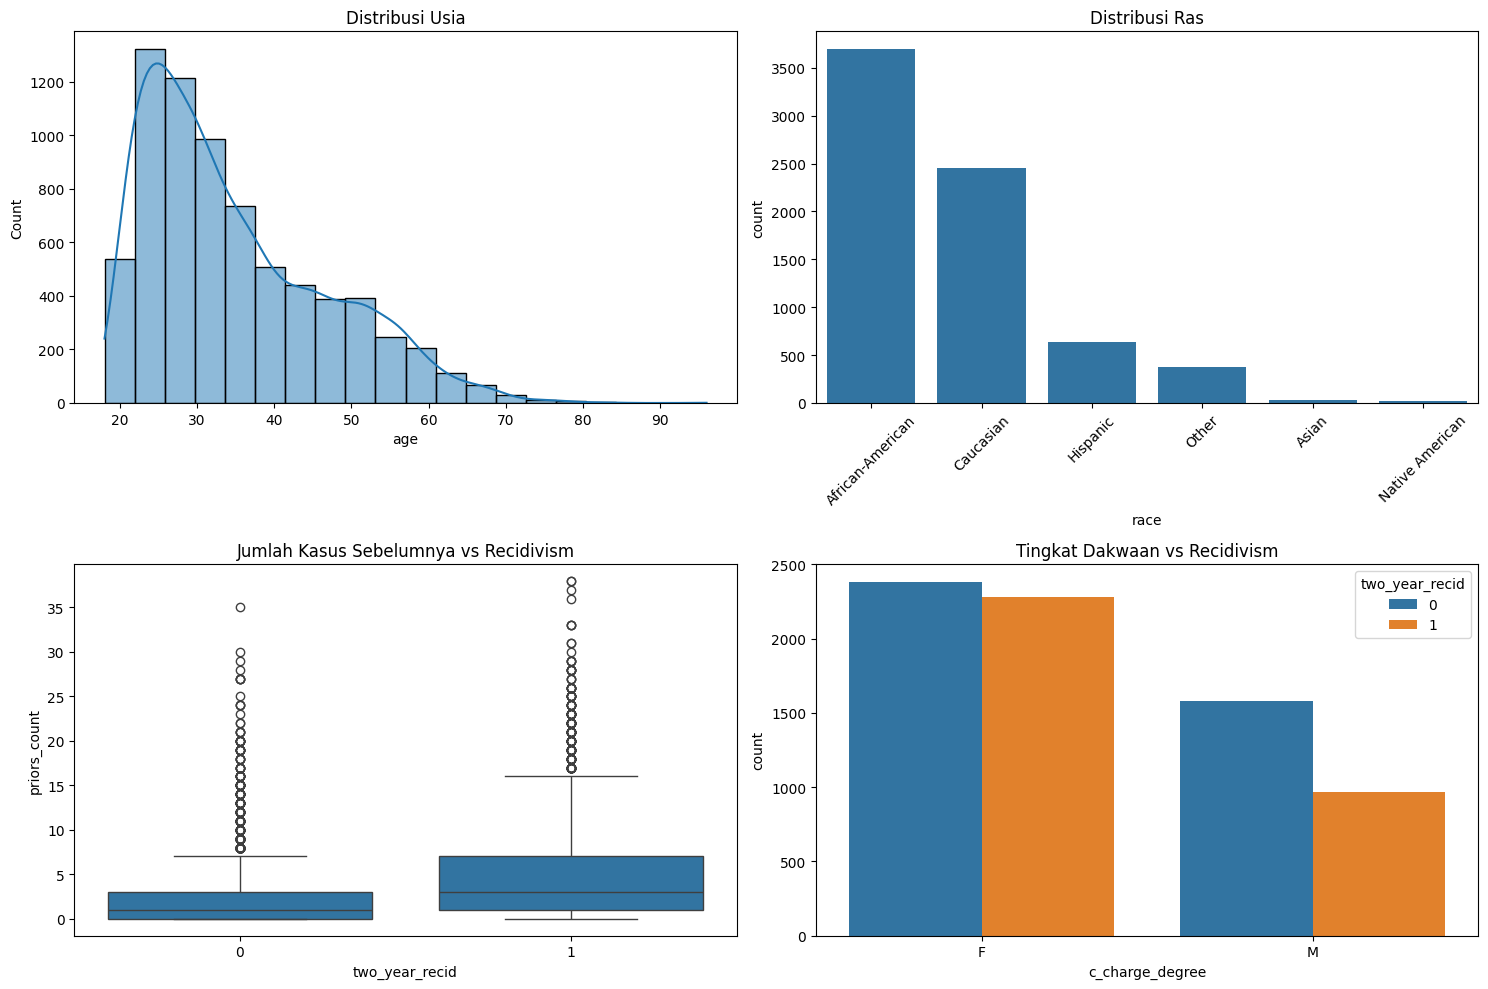

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan visualisasi
plt.figure(figsize=(15, 10))

# Distribusi usia
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi Usia')

# Distribusi ras
plt.subplot(2, 2, 2)
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Distribusi Ras')
plt.xticks(rotation=45)

# Hubungan antara jumlah kasus sebelumnya dengan recidivism
plt.subplot(2, 2, 3)
sns.boxplot(x='two_year_recid', y='priors_count', data=df)
plt.title('Jumlah Kasus Sebelumnya vs Recidivism')

# Distribusi tingkat dakwaan
plt.subplot(2, 2, 4)
sns.countplot(x='c_charge_degree', hue='two_year_recid', data=df)
plt.title('Tingkat Dakwaan vs Recidivism')

plt.tight_layout()
plt.show()


# 4. Feature Engineering

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Memisahkan fitur dan target
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Menentukan fitur numerik dan kategorikal
numeric_features = ['age', 'priors_count']
categorical_features = ['race', 'sex', 'c_charge_degree']

# Membuat pipeline untuk pra-pemrosesan
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan transformasi untuk fitur numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



# 5. Model Training

In [5]:
from sklearn.linear_model import LogisticRegression

# Membuat pipeline untuk model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Melatih model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'priors_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'sex',
                                                   'c_charge_degree'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

# 5. Evaluasi Model


Training Metrics:
Akurasi   : 0.6619
Presisi   : 0.6146
Recall    : 0.6695
F1-Score  : 0.6409
AUC-ROC   : 0.7246


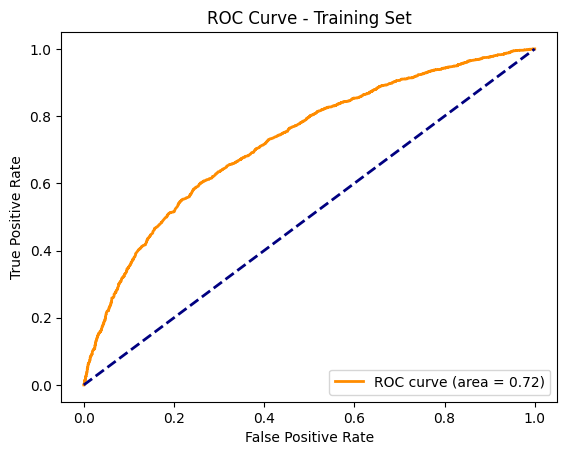

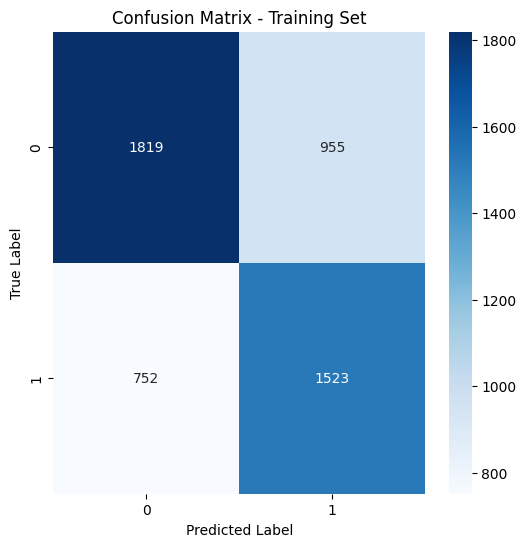


Test Metrics:
Akurasi   : 0.6568
Presisi   : 0.6115
Recall    : 0.6547
F1-Score  : 0.6324
AUC-ROC   : 0.7162


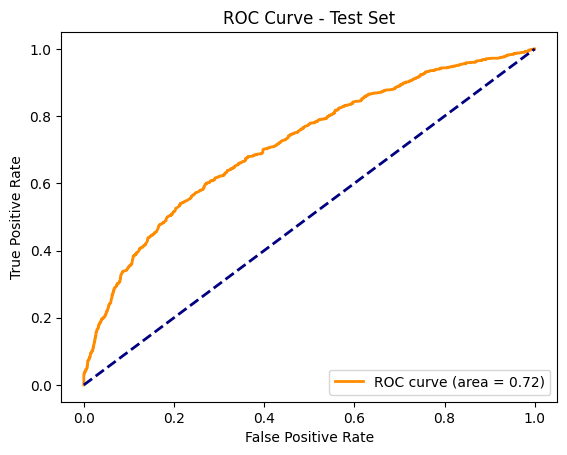

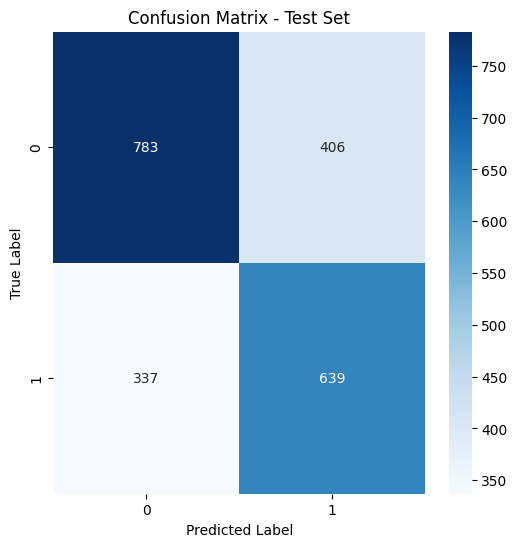

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk evaluasi model
def evaluate_model(model, X, y, set_name='Test'):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)

    # Menghitung metrik
    acc = accuracy_score(y, y_pred)
    pre = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba[:,1])

    print(f"\n{set_name} Metrics:")
    print(f"Akurasi   : {acc:.4f}")
    print(f"Presisi   : {pre:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"AUC-ROC   : {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y, y_proba[:,1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {set_name} Set')
    plt.legend(loc="lower right")
    plt.show()

    # Matriks Kebingungannya
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name} Set')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return acc, pre, rec, f1, roc_auc

# Evaluasi model pada data latih dan uji
train_metrics = evaluate_model(clf, X_train, y_train, 'Training')
test_metrics = evaluate_model(clf, X_test, y_test, 'Test')


## **1. Akurasi (Accuracy)**
Mengukur proporsi prediksi benar dari seluruh prediksi:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

## **2. Presisi (Precision)**
Mengukur akurasi prediksi positif:
$$ \text{Precision} = \frac{TP}{TP + FP} $$

## **3. Recall (Sensitivity)**
Mengukur kemampuan menemukan kasus positif:
$$ \text{Recall} = \frac{TP}{TP + FN} $$

## **4. F1-Score**
Rata-rata harmonik presisi dan recall:
$$ F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

## **5. AUC-ROC**
Luas di bawah kurva ROC:
$$ \text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}^{-1}(x)) dx $$

Dimana:
- $\text{TPR} = \frac{TP}{TP + FN}$ (True Positive Rate/Recall)
- $\text{FPR} = \frac{FP}{FP + TN}$ (False Positive Rate)